In [3]:
# Konfigurasi Spark
import os
import sys

# 1. Mengeset variabel yang menyimpan lokasi di mana Spark diinstal
spark_path = "E:\spark"

# 2. Menentukan environment variable SPARK_HOME
os.environ['SPARK_HOME'] = spark_path

# 3. Simpan lokasi winutils.exe sebagai environment variable HADOOP_HOME
os.environ['HADOOP_HOME'] = spark_path

# 4. Lokasi Python yang dijalankan --> punya Anaconda
#    Apabila Python yang diinstall hanya Anaconda, maka tidak perlu menjalankan baris ini.
os.environ['PYSPARK_PYTHON'] = sys.executable

# 5. Konfigurasi path library PySpark
sys.path.append(spark_path + "/bin")
sys.path.append(spark_path + "/python")
sys.path.append(spark_path + "/python/pyspark/")
sys.path.append(spark_path + "/python/lib")
sys.path.append(spark_path + "/python/lib/pyspark.zip")
sys.path.append(spark_path + "/python/lib/py4j-0.10.4-src.zip")

# 6. Import library Spark
#    Dua library yang WAJIB di-import adalah **SparkContext** dan **SparkConf**.
from pyspark import SparkContext
from pyspark import SparkConf

# Setting konfigurasi (opsional)
conf = SparkConf()
conf.set("spark.executor.memory", "2g")
conf.set("spark.cores.max", "4")

sc = SparkContext("local", conf=conf)
#    Apabila berhasil, maka ketika sc di-print akan mengeluarkan nilai <pyspark.context.SparkContext object>
print sc

ValueError: Cannot run multiple SparkContexts at once; existing SparkContext(app=pyspark-shell, master=local) created by __init__ at <ipython-input-1-c6158783d443>:36 

In [4]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Make the graphs a bit prettier, and bigger
pd.set_option('display.mpl_style', 'default')
plt.rcParams['figure.figsize'] = (15, 5)
plt.rcParams['font.family'] = 'sans-serif'

# This is necessary to show lots of columns in pandas 0.12. 
# Not necessary in pandas 0.13.
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60)

E:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:2881: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


In [16]:
na_values = ['NO CLUE', 'N/A', '0','']
request = pd.read_csv('E://Dataset//complete.csv', error_bad_lines=False,na_values=na_values)

Skipping line 878: expected 11 fields, saw 12
Skipping line 1713: expected 11 fields, saw 12
Skipping line 1815: expected 11 fields, saw 12
Skipping line 2858: expected 11 fields, saw 12
Skipping line 3734: expected 11 fields, saw 12
Skipping line 4756: expected 11 fields, saw 12
Skipping line 5389: expected 11 fields, saw 12
Skipping line 5423: expected 11 fields, saw 12
Skipping line 5614: expected 11 fields, saw 12
Skipping line 5849: expected 11 fields, saw 12
Skipping line 6093: expected 11 fields, saw 12
Skipping line 7516: expected 11 fields, saw 12
Skipping line 7626: expected 11 fields, saw 12
Skipping line 8893: expected 11 fields, saw 12
Skipping line 9015: expected 11 fields, saw 12
Skipping line 9571: expected 11 fields, saw 12
Skipping line 9620: expected 11 fields, saw 12
Skipping line 9751: expected 11 fields, saw 12
Skipping line 10157: expected 11 fields, saw 12
Skipping line 10427: expected 11 fields, saw 12
Skipping line 12035: expected 11 fields, saw 12
Skipping li

In [17]:
req = (request.drop('latitude', axis=1)
         .join(request['latitude'].apply(pd.to_numeric, errors='coerce')))

req2 = (req.drop('longitude', axis=1)
         .join(req['longitude'].apply(pd.to_numeric, errors='coerce')))

In [19]:
reqcopy = req2[['latitude', 'longitude']].copy()
reqany = new.dropna(how='any')

In [21]:
from numpy import array
from math import sqrt
from pyspark.mllib.clustering import KMeans, KMeansModel
from pyspark.sql import SQLContext
sqlcontext = SQLContext(sc)
frame = sqlcontext.createDataFrame(reqany)
frame.take(50)

[Row(latitude=29.883055600000006, longitude=-97.94111109999999),
 Row(latitude=29.384209999999996, longitude=-98.581082),
 Row(latitude=53.2, longitude=-2.916667),
 Row(latitude=28.9783333, longitude=-96.64583329999999),
 Row(latitude=21.418055600000002, longitude=-157.8036111),
 Row(latitude=36.595, longitude=-82.18888890000001),
 Row(latitude=51.434722, longitude=-3.18),
 Row(latitude=41.1175, longitude=-73.4083333),
 Row(latitude=33.586111100000004, longitude=-86.28611109999999),
 Row(latitude=30.294722200000002, longitude=-82.9841667),
 Row(latitude=33.916388899999994, longitude=-118.35166670000001),
 Row(latitude=35.2333333, longitude=-82.7344444),
 Row(latitude=40.66861110000001, longitude=-73.5275),
 Row(latitude=37.153611100000006, longitude=-83.7619444),
 Row(latitude=35.8238889, longitude=-80.25361109999999),
 Row(latitude=36.84305560000001, longitude=-83.3219444),
 Row(latitude=42.5377778, longitude=-83.2330556),
 Row(latitude=41.3252778, longitude=-72.1936111),
 Row(latitud

In [22]:
rdd = frame.rdd
result = rdd.map(lambda line: array([x for x in line]))

In [23]:
datasaved.collect()

[array([ 29.8830556, -97.9411111]),
 array([ 29.38421 , -98.581082]),
 array([ 53.2     ,  -2.916667]),
 array([ 28.9783333, -96.6458333]),
 array([  21.4180556, -157.8036111]),
 array([ 36.595    , -82.1888889]),
 array([ 51.434722,  -3.18    ]),
 array([ 41.1175   , -73.4083333]),
 array([ 33.5861111, -86.2861111]),
 array([ 30.2947222, -82.9841667]),
 array([  33.9163889, -118.3516667]),
 array([ 35.2333333, -82.7344444]),
 array([ 40.6686111, -73.5275   ]),
 array([ 37.1536111, -83.7619444]),
 array([ 35.8238889, -80.2536111]),
 array([ 36.8430556, -83.3219444]),
 array([ 42.5377778, -83.2330556]),
 array([ 41.3252778, -72.1936111]),
 array([ 32.364167, -64.678611]),
 array([ 42.3916667, -71.5666667]),
 array([ 51.5,  -3.2]),
 array([ 38.1055556, -98.6597222]),
 array([ 32.8544444, -79.975    ]),
 array([  45.5827778, -122.3522222]),
 array([ 51.783333,  -0.783333]),
 array([ 29.4238889, -98.4933333]),
 array([ 38.2541667, -85.7594444]),
 array([ 40.7008333, -73.7133333]),
 array([

In [28]:
datacls = KMeans.train(datasaved, 3, maxIterations=1000, initializationMode="random")

In [29]:
hasildata = datasaved.map(datacls.predict)
a = datasaved.collect()
label = predictCluster.collect()

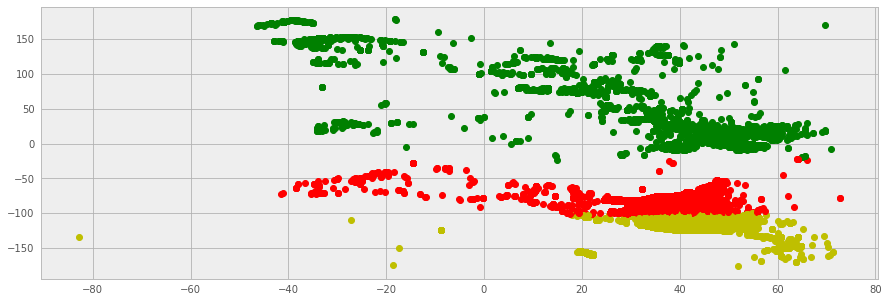

In [30]:
import numpy as np
import matplotlib.pyplot as plt


for point in range(0,len(label)):
    if (label[point]==0):
        color = "r";
    elif (label[point]==1):
        color = "g";
    elif (label[point]==2):
        color = "y";
    lines = plt.plot(a[point][0], a[point][1], 'ro')
    plt.setp(lines, color=color, linewidth=2.0)